In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from citipy import citipy
import requests
from config import weather_api_key
from config import gmaps_api_key
import time
from datetime import datetime
from scipy.stats import linregress
import gmaps

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

14.461146799980327 -125.20023025275688
-75.6039286377857 124.68745224511082
56.59687890194789 141.41644065371383
65.35273903479884 4.656586459037271
-31.402033518207233 -137.172342220722
-47.690367321538524 -24.93032582451687
-41.25664084261357 54.97449213744011
82.77365291944949 -32.014495756594954
65.40588048275086 115.7915388229323
-1.3236259078530281 112.90149668654936
74.99788256314511 37.05788888852402
73.73179119869394 -55.44815063884354
-81.28598706140649 -58.66555972068579
-19.254606224687862 160.5248982987386
-37.59202787701481 37.05989331216435
53.413412582514155 -27.812454040592343
-33.528118495741346 -84.0526686760618
64.85835194881105 101.56388113799824
-19.092683812911133 87.41692086124846
36.18084231745658 131.8382479594543
33.31443533749753 -118.75957937311657
-1.0496648539350417 33.18663929284202
89.7593820261232 171.36112933936715
-38.22566893923321 92.5349340410304
-24.11497459637303 -72.36494415952406
12.757351002731639 50.853955140638504
-30.020617494207414 157.10

-11.531841542050529 1.7191680508183822
62.189462765647534 157.50989478966756
46.2780696858695 -91.19762751312115
-14.853278870633474 -44.489083496728995
44.915985841798005 -116.15172646349458
-64.50613448317159 120.93734447938863
-36.53529059631783 -76.93902825272609
-9.608290129579899 33.90601539316975
-50.56586859055095 -120.26974520757439
-10.824135989879878 139.19539547038755
-29.569620029139855 150.54880321688916
54.60906338242975 76.88739108837433
54.92557933929291 26.232706162505735
9.90331776011189 -158.51311140278494
-76.77554407452278 71.99701920779708
34.79031859709325 8.361046294982316
70.36666687249851 -23.54671451551698
-69.78370562018937 -63.999424850089
-1.0187454210747973 18.596668274937116
48.072285994463726 47.040588695734186
74.24864358974867 88.15253478576511
-72.07589346227162 -61.41502020575193
-71.2902159904497 -156.78886777497348
-10.527273907603984 -21.29773795809703
-71.01734246562079 124.0254707148382
-50.62786013055413 -148.87858949948182
15.179463241279976

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

618

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | constitucion
Processing Record 2 of Set 1 | new norfolk
Processing Record 3 of Set 1 | mnogovershinnyy
Processing Record 4 of Set 1 | roald
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | arraial do cabo
Processing Record 7 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 8 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 9 of Set 1 | almaznyy
Processing Record 10 of Set 1 | sampit
Processing Record 11 of Set 1 | tumannyy
City not found. Skipping...
Processing Record 12 of Set 1 | upernavik
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | poum
Processing Record 15 of Set 1 | margate
Processing Record 16 of Set 1 | grindavik
Processing Record 17 of Set 1 | lebu
Processing Record 18 of Set 1 | tura
Processing Record 19 of Set 1 | bengkulu
Processing Record 20 of Set 1 | oda
Processing Record 21 of Set 1 | rancho

Processing Record 39 of Set 4 | hamilton
Processing Record 40 of Set 4 | atambua
Processing Record 41 of Set 4 | batemans bay
Processing Record 42 of Set 4 | namibe
Processing Record 43 of Set 4 | marcona
City not found. Skipping...
Processing Record 44 of Set 4 | college
Processing Record 45 of Set 4 | sentyabrskiy
City not found. Skipping...
Processing Record 46 of Set 4 | alofi
Processing Record 47 of Set 4 | saint-pierre
Processing Record 48 of Set 4 | ishigaki
Processing Record 49 of Set 4 | surazh
Processing Record 50 of Set 4 | kirksville
Processing Record 1 of Set 5 | penzance
Processing Record 2 of Set 5 | seguela
Processing Record 3 of Set 5 | kulhudhuffushi
Processing Record 4 of Set 5 | vila franca do campo
Processing Record 5 of Set 5 | gelgaudiskis
Processing Record 6 of Set 5 | ribas do rio pardo
Processing Record 7 of Set 5 | mizdah
Processing Record 8 of Set 5 | akyab
Processing Record 9 of Set 5 | eureka
Processing Record 10 of Set 5 | port lincoln
Processing Record 1

Processing Record 30 of Set 8 | karamea
City not found. Skipping...
Processing Record 31 of Set 8 | zyryanovsk
Processing Record 32 of Set 8 | chaiyaphum
Processing Record 33 of Set 8 | karasjok
Processing Record 34 of Set 8 | starosubkhangulovo
Processing Record 35 of Set 8 | cabra
Processing Record 36 of Set 8 | lewistown
Processing Record 37 of Set 8 | khatanga
Processing Record 38 of Set 8 | bardiyah
Processing Record 39 of Set 8 | cockburn harbour
City not found. Skipping...
Processing Record 40 of Set 8 | pisco
Processing Record 41 of Set 8 | camana
Processing Record 42 of Set 8 | okhotsk
Processing Record 43 of Set 8 | medvezhyegorsk
Processing Record 44 of Set 8 | isangel
Processing Record 45 of Set 8 | guerrero negro
Processing Record 46 of Set 8 | nanortalik
Processing Record 47 of Set 8 | cap-aux-meules
Processing Record 48 of Set 8 | marsabit
Processing Record 49 of Set 8 | platteville
Processing Record 50 of Set 8 | nizhniy kuranakh
Processing Record 1 of Set 9 | pemangkat

Processing Record 16 of Set 12 | bandarbeyla
Processing Record 17 of Set 12 | vakhrushev
Processing Record 18 of Set 12 | bushehr
Processing Record 19 of Set 12 | riyadh
Processing Record 20 of Set 12 | bosaso
Processing Record 21 of Set 12 | naron
Processing Record 22 of Set 12 | gewane
Processing Record 23 of Set 12 | wanaka
Processing Record 24 of Set 12 | ashti
Processing Record 25 of Set 12 | aksehir
Processing Record 26 of Set 12 | itoman
Processing Record 27 of Set 12 | barbar
City not found. Skipping...
Processing Record 28 of Set 12 | togur
Processing Record 29 of Set 12 | kavaratti
Processing Record 30 of Set 12 | kita
Processing Record 31 of Set 12 | campbell river
Processing Record 32 of Set 12 | ahipara
Processing Record 33 of Set 12 | sulangan
Processing Record 34 of Set 12 | ganassi
Processing Record 35 of Set 12 | mareeba
Processing Record 36 of Set 12 | santa cruz de tenerife
Processing Record 37 of Set 12 | carutapera
Processing Record 38 of Set 12 | yenagoa
Processin

In [8]:
len(city_data)

564

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Constitucion,-35.3333,-72.4167,51.01,74,100,12.84,CL,2022-07-06 14:48:12
1,New Norfolk,-42.7826,147.0587,49.71,80,81,2.53,AU,2022-07-06 14:48:12
2,Mnogovershinnyy,53.9353,139.9242,71.20,71,91,5.14,RU,2022-07-06 14:48:13
3,Roald,62.5833,6.1333,55.54,88,75,9.22,NO,2022-07-06 14:48:13
4,Rikitea,-23.1203,-134.9692,74.73,76,3,19.37,PF,2022-07-06 14:48:09
5,Arraial Do Cabo,-22.9661,-42.0278,82.36,65,0,9.22,BR,2022-07-06 14:48:14
6,Almaznyy,48.0448,40.0450,84.47,25,0,12.12,RU,2022-07-06 14:48:14
7,Sampit,-2.5333,112.9500,73.78,97,100,1.54,ID,2022-07-06 14:48:15
8,Upernavik,72.7868,-56.1549,39.42,79,31,10.18,GL,2022-07-06 14:46:12
9,Ushuaia,-54.8000,-68.3000,26.26,80,0,6.91,AR,2022-07-06 14:47:45


In [10]:
new_column_order = ["City", "Country", "Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Constitucion,CL,2022-07-06 14:48:12,-35.3333,-72.4167,51.01,74,100,12.84
1,New Norfolk,AU,2022-07-06 14:48:12,-42.7826,147.0587,49.71,80,81,2.53
2,Mnogovershinnyy,RU,2022-07-06 14:48:13,53.9353,139.9242,71.20,71,91,5.14
3,Roald,NO,2022-07-06 14:48:13,62.5833,6.1333,55.54,88,75,9.22
4,Rikitea,PF,2022-07-06 14:48:09,-23.1203,-134.9692,74.73,76,3,19.37
5,Arraial Do Cabo,BR,2022-07-06 14:48:14,-22.9661,-42.0278,82.36,65,0,9.22
6,Almaznyy,RU,2022-07-06 14:48:14,48.0448,40.0450,84.47,25,0,12.12
7,Sampit,ID,2022-07-06 14:48:15,-2.5333,112.9500,73.78,97,100,1.54
8,Upernavik,GL,2022-07-06 14:46:12,72.7868,-56.1549,39.42,79,31,10.18
9,Ushuaia,AR,2022-07-06 14:47:45,-54.8000,-68.3000,26.26,80,0,6.91


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

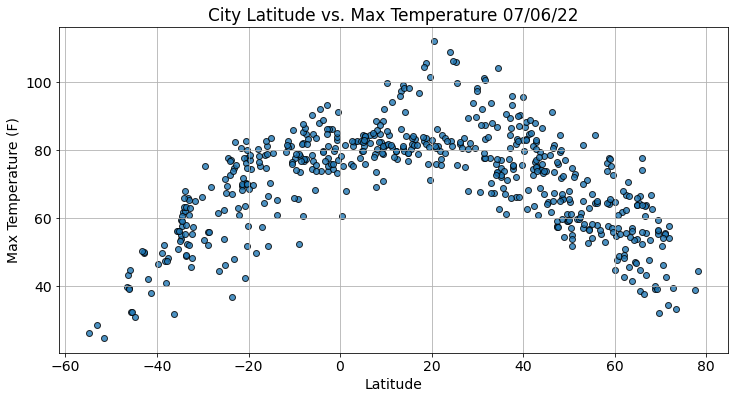

In [13]:
# Build the scatter plot for latitude vs. max temperature.
plt.figure(figsize=(12,6))
plt.rcParams.update({"font.size":14})
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

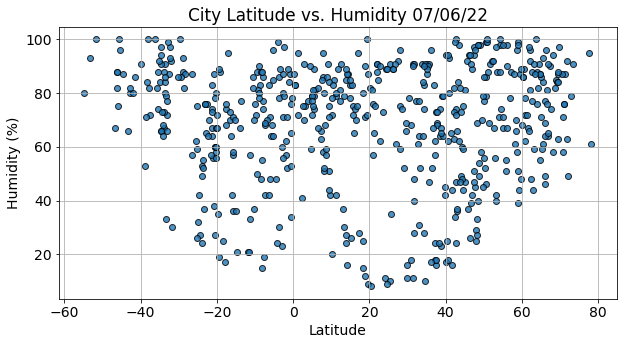

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.figure(figsize=(10,5))
plt.rcParams.update({"font.size":14})
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

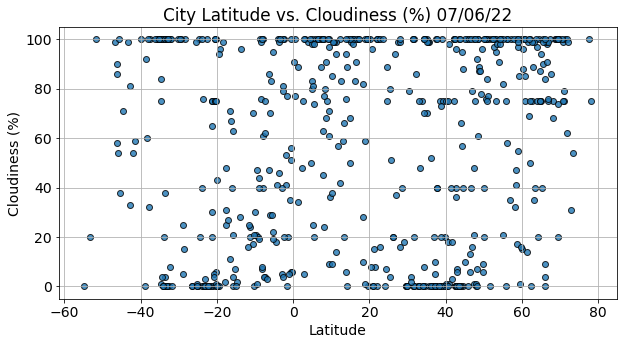

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.figure(figsize=(10,5))
plt.rcParams.update({"font.size":14})
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

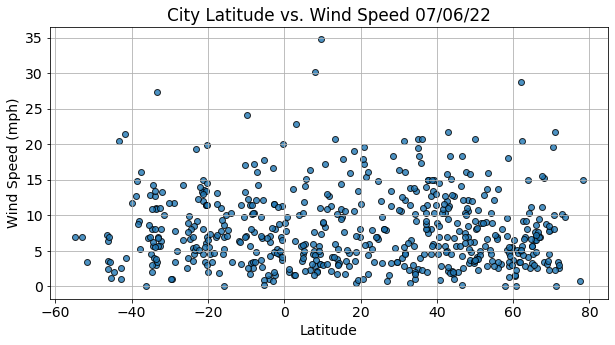

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.figure(figsize=(10,5))
plt.rcParams.update({"font.size":14})
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [32]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.

def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    # Create a scatter plot and plot the regression line.
    plt.figure(figsize=(10,5))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [18]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

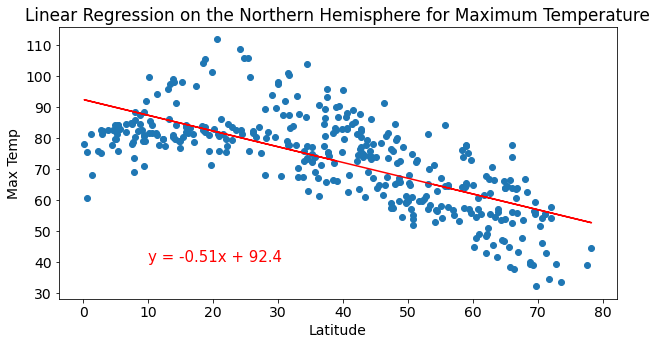

In [34]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Maximum Temperature', 'Max Temp',(10,40))

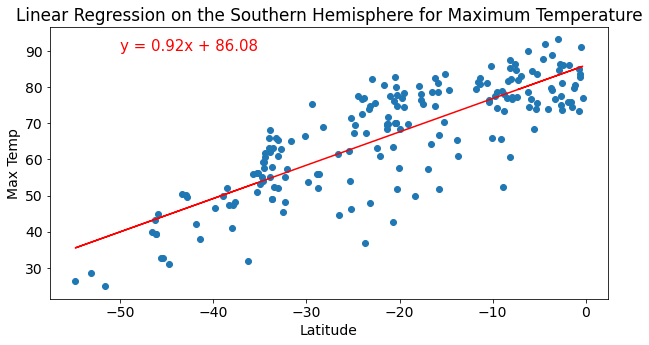

In [36]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Maximum Temperature', 'Max Temp',(-50,90))

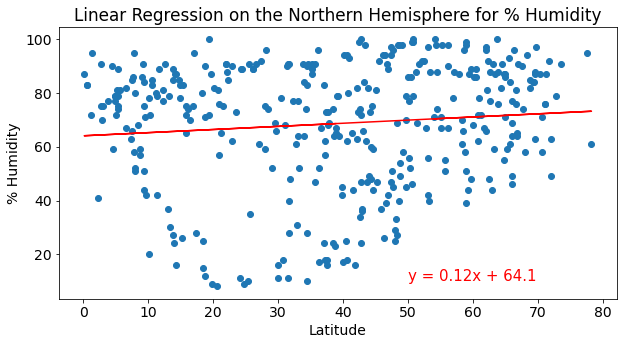

In [61]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Humidity', '% Humidity',(50,10))

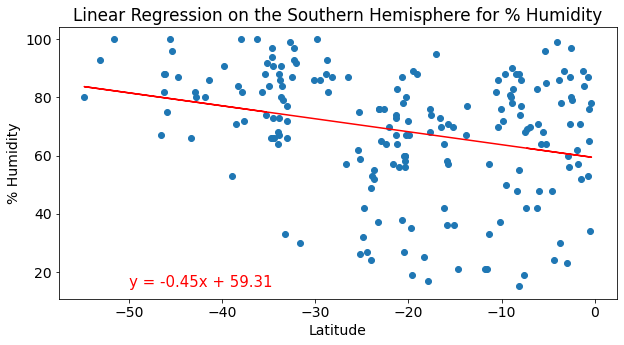

In [40]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Humidity', '% Humidity',(-50,15))

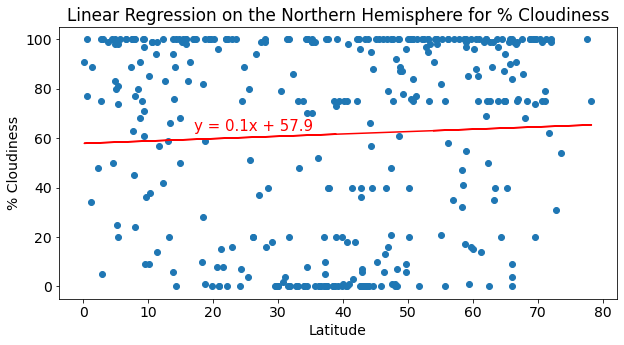

In [50]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for % Cloudiness', '% Cloudiness',(17,63))

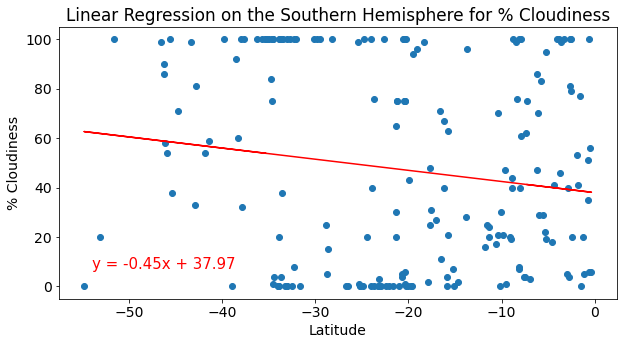

In [60]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for % Cloudiness', '% Cloudiness',(-54,7))

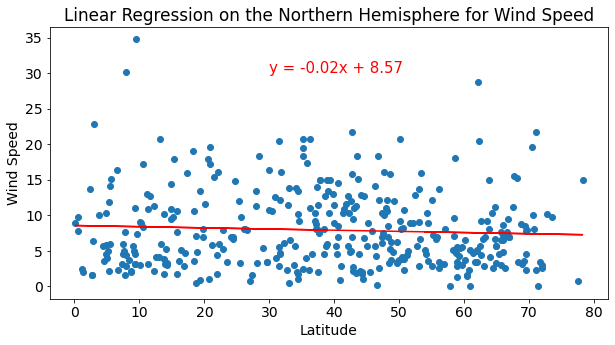

In [65]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere for Wind Speed', 'Wind Speed',(30,30))

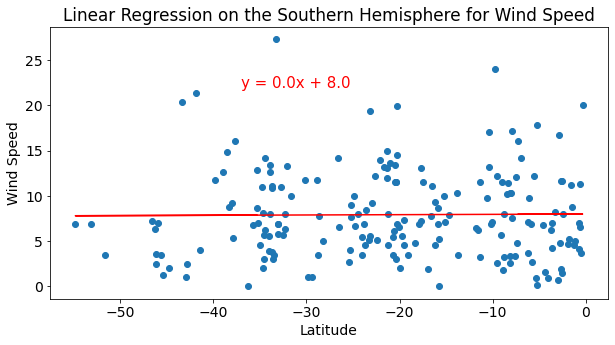

In [70]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere for Wind Speed', 'Wind Speed',(-37,22))